---
# Esercitazione 8
---
## Variational Monte Carlo in Meccanica Quantistica
Il principio variazionale in Meccanica Quantistica garantisce che, per ogni funzione d'onda generica $\psi_{T}(x)$, il seguente funzionale è limitato inferiormente:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

dove $\Psi_0$ è la funzione d'onda del Ground State dell'Hamiltoniana $\hat H$. Ovvero, la funzione d'onda di test $\psi_{T}(x)$ è un $\underline{minimo}$ di tale funzionale se essa è quella dello stato fondamentale, soluzione esatta dell'equazione di Schrodinger. 

In questa esercitazione verrà campionato lo stato fondamentale di una particella quantistica 1D confinata dal seguente potenziale:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

ovvero l'evoluzione del sistema è descritta dalla seguente Hamiltoniana:

$$
{\hat H} = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right)
$$

Questo problema non è risolvibile analiticamente, pertanto verrà utilizzato il calcolo numerico e il metodo del Variational Monte Carlo. La funzione d'onda di prova utilizzata ha la seguente struttura:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

e dipende dunque da due parametri variazionali: $\sigma$ e $\mu$. Si noti che la costante moltiplicativa, ovvero la normalizzazione, non è esplicitata: come già osservato nell'esercitazione $5$, con l'algoritmo di Metropolis non è necessario conoscerla.

Per questa esercitazione viene scritto un codice VMC in grado di risolvere questo problema e campionare la funzione d'onda dello stato fondamentale.

## Esercizio 08.1
In questo primo punto viene implementato nel codice il campionamento del modulo quadro della funzione d'onda di prova $|\Psi_T^{\sigma,\mu}(x)|^2$. In analogia con l'esercitazione $5$, si utilizza l'algoritmo di Metropolis con una probabilità di transizione uniforme. Il codice implementato è in grado di calcolare il valore di aspettazione dell'Hamiltoniana, utile in seguito per trovare i paramenti variazionali $\sigma$ e $\mu$ che lo minimizzano.

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Moltiplicando e dividendo per $\Psi_T(x)$ si riesce a riscrivere questo valore di aspettazione come valor medio di un'altra funzione: $\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$, con distribuzione di probabilità data da $|\Psi_T|^2$. Il calcolo esplicito di questa funzione risulta essere quanto segue (con $\hbar = 1$ e $m=1$):

$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \dfrac{1}{2\sigma} \left[1 - \dfrac{\left[ \left(\dfrac{x-\mu}{\sigma}\right)^2 \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}} + \left(\dfrac{x+\mu}{\sigma}\right)^2 \cdot e^{-\frac{(x+\mu)^2}{2\sigma^2}} \right]}{\Psi_T(x)} \right] +V(x)
$$

Prima di procedere con la misura dei valori di aspettazione dell'Hamiltoniana, si analizza il valore ottimale di $\delta$ che rende l'accettazione più vicina possibile al $50\%$, dove la probabilità di transizione uniforme lo è in $[x-{\delta \over 2} ; x+ {\delta \over 2}]$. 
Per fare ciò si è implementato un algoritmo in grado di trovare il valore di $\delta$ ottimale. Esso esegue l'algoritmo di Metropolis nella fase di equilibrazione, calcola il rate di accettazione al variare di $\delta$ e si arresta non appena l'accettazione è compresa tra $0.49$ e $0.51$ (riduce il valore a step di $0.1$ se l'accettazione è troppo bassa e viceversa). Questo procedimento viene ripetuto per ogni coppia di valori $\mu$ e $\sigma$ analizzati, infatti per ognuno di questi parametri vi è un $\delta$ ottimale differente. 
Una volta trovato questo parametro, si calcola il valore di aspettazione dell'energia e il relativo errore, effettuando $10^6$ estrazioni dell'algoritmo di Metropolis suddivise in $100$ blocchi. In base ai risultati ottenuti, si è notato che un buon compromesso per la stabilità dell'algoritmo è ottenuto impostando $10^4$ step  preliminari di equilibrazione (il valore di accettazione nella fase successiva a quella di equilibrazione si è mantenuta invariata). 
Questo procedimento viene effettuato al variare di $\mu$ e $\sigma$ in un range pari a $[0.6;1.0]$ e $[0.4;0.8]$ rispettivamente, a step di $0.02$. Si sono ottenuti così $441$ valori di energia che vengono plottati di seguito. I range particolari scelti derivano da uno studio preliminare effettuato con range più generici, dove in questi ultimi ci si è concentrati nell'intorno del minimo dell'energia. 

Il valore iniziale utilizzato nell'algoritmo è $x=0$. Infatti, anche se non è il massimo della distribuzione $|\psi_T|^2$ (com'è preferibile per l'algoritmo di Metropolis), si dimostra analiticamente essere un minimo non nullo per ogni valore di $\mu$ e $\sigma$, e inoltre è il centro di simmetria del problema. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# carico i valori dell'energia al variare di mu e sigma
mu, sigma, E = np.loadtxt("./dati/best_delta.dat", unpack= True, usecols=(0,1,2), skiprows=1)

Terna con energia minore: (0.8, 0.62, -0.444511)


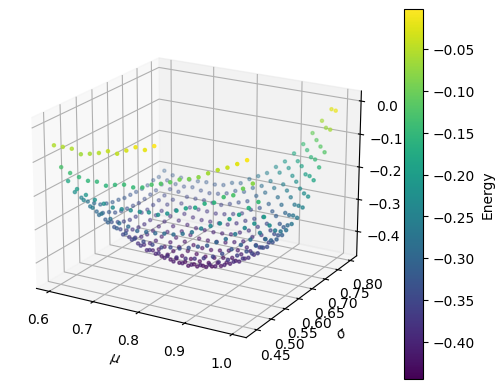

In [2]:
data = list(zip(mu, sigma, E))
parametri_minimi = min(data, key=lambda triplet: triplet[2])
print("Terna con energia minore:", parametri_minimi)

mu_min, sigma_min, energy_min = parametri_minimi

neg_indexes = E<0
mu = mu[neg_indexes]
sigma = sigma[neg_indexes]
E = E[neg_indexes]

# Crea una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta i punti
sc = ax.scatter(mu, sigma, E, c=E, cmap='viridis', marker='.')

# Etichette degli assi
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\sigma$")
ax.set_zlabel('Energy')

# Aggiungi una barra del colore per mostrare la scala delle distanze
cbar = fig.colorbar(sc)
cbar.set_label('Energy')

# Inclina la visuale di 25 gradi sull'asse z
ax.view_init(elev=20, azim=-60)

# Mostra il grafico
plt.show()

Come è possibile notare, il campionamento dell'energia per diversi valori di $\mu$ e $\sigma$ permette di ottenere diversi valori dell'energia. Il valore minimo è ottenuto per $\mu = 0.80$ e $\sigma = 0.62$ e vale $(-44.45 \pm 0.09) \cdot 10^{-2}$, con un delta trovato pari a $5.3$.

## Esercizio 08.2 - Simulated Annealing
Nel secondo punto di questa esercitazione si vuole utilizzare l'algoritmo del Simulated Annealing, in grado di ottenere la combinazione ottimale di $\mu$ e $\sigma$ che minimizza il valore di aspettazione dell'Hamiltoniana. 
L'algoritmo del Simulated Annealing funziona tramite un'analogia con la Termodinamica, in cui raffreddando un sistema esso tende autonomamente a raggiungere un minimo dell'energia. A livello statistico, presa una configurazione $\vec{x}$ con "energia" $L(\vec{x})$, associata ad una certa temperatura, genero una nuova distribuzione $\vec{x}'$ con "energia" $L(\vec{x}')$ che rimpiazza la configurazione di partenza con probabilità di Boltzmann:

$$
p(x) =
   \begin{cases}
     \exp \left[ -\beta \left(L(\vec{x}')-L(\vec{x}) \right) \right] & , L(\vec{x}') > L(\vec{x}) \\
     1 & \text{, altrimenti} \\
   \end{cases}
$$

successivamente faccio tendere a zero la temperatura fittizzia, creando dunque una sequenza di step a temperatura sempre decrescente. Matematicamente questo processo è una catena di Markov time-dependent. <br>
Tale ditribuzione verrà campionata con Metropolis, si crea una successione di temperatura decrescente. Per ogni temperatura fissata si estraggono, da distribuzione uniforme e con un certo valore comune di $\delta$, due nuovi candidati di $\mu$ e $\sigma$. Con questi valori viene calcolato il nuovo valor medio dell'Hamiltoniana sulla funzione di test associata, sempre utilizzando Metropolis (come visto in precedenza). Calcolo il valor medio dell'Hamiltoniana anche per i valori vecchi di $\mu$ e $\sigma$. A questo punto calcolo la probabilità di accettazione come sopra indicato, utilizzando la differenza tra le energie. Si noti che se la nuova energia proposta è minore di quella vecchia allora la configurazione viene sempre accettata perché l'esponenziale è sempre maggiore di 1; se invece la nuova energia è maggiore viene accettata con probabilità di Boltzmann. Ciò significa rifiutare la configurazione se estraendo un numero casuale compreso tra $0$ e $1$ esso viene minore del fattore di Boltzmann. Una volta testata tutta la sequenza di temperature si calcola il rapporto di accettazione. Il valore di $\delta$ citato all'inizio per l'algoritmo SA è quello che rende questo rapporto più vicino possibile al $50 \%$.

Prima di utilizzare l'algoritmo viene qui proposta un'osservazione. Di seguito viene mostrato un istogramma contenente i diversi valori di $\delta$ ottenuti per ogni coppia di $\mu$ e $\sigma$, in un intorno della coppia per cui l'energia è minima: i due intervalli sono $[0.55;0.69]$ per $\sigma$ e $[0.73;0.87]$ per $\mu$. 


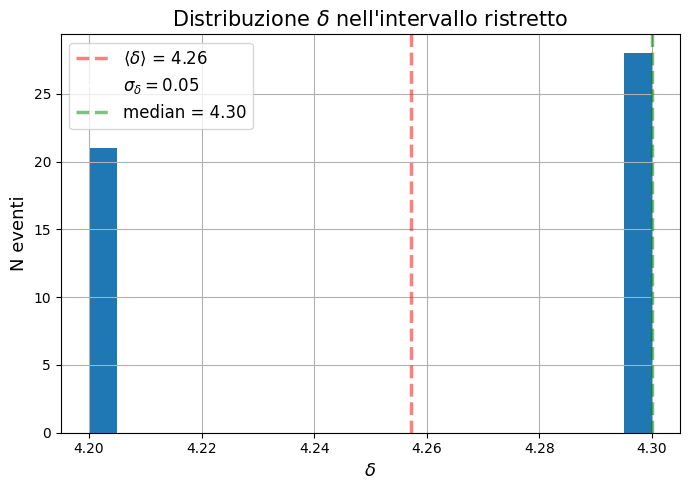

In [8]:
# Controllo il valore di delta per le coppie di mu e sigma nel sottointervallo ristretto
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

# carico i valori dell'energia al variare di mu e sigma
mu, sigma, delta = np.loadtxt("./dati/best_delta.dat", unpack= True, usecols=(0,1,4), skiprows=1)

mu = np.array(mu)
sigma = np.array(sigma)
delta = np.array(delta)

# Setto gli intervalli ristretti di mu e sigma
mu_min = 0.73
mu_max = 0.87
sigma_min = 0.55
sigma_max = 0.69

delta_min = []

for m,s in zip(mu, sigma):
    if mu_min <= m <= mu_max and sigma_min <= s <= sigma_max:
        index = np.where(sigma == s)[0][0]
        delta_min.append(delta[index])

media = np.mean(delta_min)
dev_std = np.std(delta_min)
mediana = np.median(delta_min)

plt.figure(figsize=(7, 5))
plt.hist(delta_min, bins=20, density=False)

plt.axvline(media,label=r'$\langle \delta \rangle$ = %.2f' %(media), color="red",alpha=0.5,ls='--', lw=2.5)
plt.plot(media, 0, linewidth=1, label=r'$\sigma_{\delta} = %.2f $' %(dev_std), color="white")
plt.axvline(mediana,label=r'median = %.2f' %(mediana), color="green",alpha=0.5,ls='--', lw=2.5)

plt.legend(loc='upper left', prop={'size': 12})

plt.title(r"Distribuzione $\delta$ nell'intervallo ristretto",fontsize=15)
plt.xlabel(r"$\delta$", fontsize=13)
plt.ylabel("N eventi", fontsize=13)

plt.grid(True)
plt.tight_layout()
plt.show()


La distribuzione ottenuta suggerisce che sarebbe possibile utilizzare l'algoritmo SA con un valore fissato di $\delta$ nel caso in cui l'algoritmo ricercasse i parametri variazionali in questi sottointervalli. Tuttavia per ogni step dell'algoritmo SA vengono estratti casualmente i due nuovi parametri $\mu_{new}$ e $\sigma_{new}$, in un range pari a $[\mu_{old}+\frac{\delta_{SA}}{2};\mu_{old}+\frac{\delta_{SA}}{2}]$ (analogo per $\sigma_{old}$). Una prova preliminare ha constatato che l'algoritmo esplora coppie di $\mu$ e $\sigma$ anche fuori dai sottointervalli sopracitati. Vengono omessi i risultati, ma la probabilità di accettazione per il campionamento della funzione d'onda risulta essere a volte distante dal $50\%$, causando un risultato non corretto per il calcolo dell'energia e invalidando dunque la procedura dell'algoritmo SA. 

Per risolvere questo problema, viene nuovamente introdotta nell'algortimo la ricerca del delta ottimale per ogni coppia $\mu$ e $\sigma$ estratta. Con questa accortezza è ora possibile lasciare l'algoritmo SA libero di variare in un range più esteso di questi parametri variazionali, rendendo possibile fissare il parametro $\delta_{SA}$ senza preoccuparsi di fuoriuscire da intervalli di validità.

Di seguito viene riportato l'andamento dei parametri $\mu$ e $\sigma$ selezionati dall'algoritmo SA a partire da una pseudotemperatura di $0.1$ fino a $0.0005$ a step di $0.005$, ovvero in totale vengono effettuati 200 step. Il parametro $\delta_{SA}$ è stato fissato a $0.25$ e questo ha garantito una probabilità di accettazione di 0.495. Come valori iniziali di ricerca si è fissato $\mu=0.7$ e $\sigma=0.8$, lontani dalla coppia trovata prima, in modo da verificare che si ottengano valori compatibili anche con un metodo diverso.

Di seguito viene mostrato il plot che rappresenta la ricerca dell'algoritmo SA al ridursi della temperatura.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori dell'energia al variare di mu e sigma
mu, sigma, energy = np.loadtxt("./dati/SA_results_025.dat", unpack= True, usecols=(1,2,3), skiprows=1)

Terna con energia minore: (0.805113, 0.625067, -0.445187)


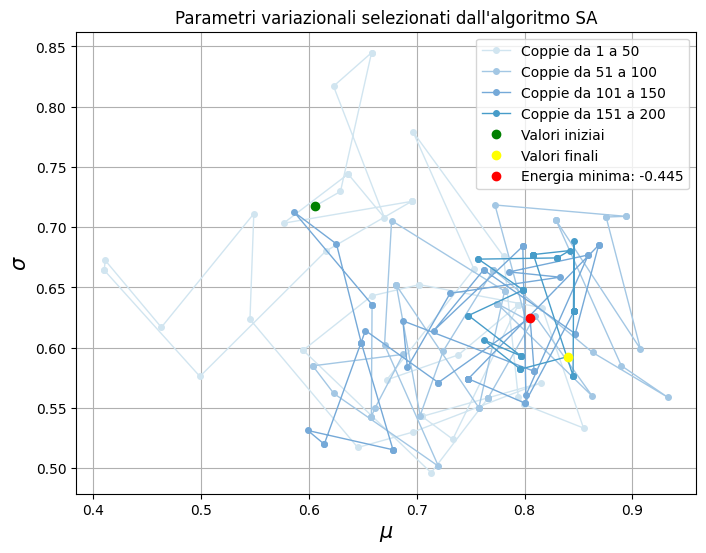

In [2]:
data = list(zip(mu, sigma, energy))
parametri_minimi = min(data, key=lambda triplet: triplet[2])
print("Terna con energia minore:", parametri_minimi)

mu_min, sigma_min, energy_min = parametri_minimi

# plotto i primi 25 punti
colors = ['#d1e5f0', '#a3c7e4', '#75a9d8', '#479cc9']

plt.figure(figsize=(8, 6))

for i in range(0, len(mu), 50):
    color_index = i // 50
    plt.plot(mu[i:i+51], sigma[i:i+51], label=f'Coppie da {50*(color_index)+1} a {50*(color_index+1)}', color=colors[color_index], marker='o', linestyle='-', lw=1, markersize = 4)

plt.plot(mu[0], sigma[0], "o", color='green',label = "Valori iniziai")
plt.plot(mu[-1], sigma[-1], "o", color='yellow', label = "Valori finali")
plt.plot(mu_min , sigma_min, "o", color='red', label = f"Energia minima: {energy_min:.3f}")

plt.title('Parametri variazionali selezionati dall\'algoritmo SA')
plt.xlabel('$\mu$', size=15)
plt.ylabel('$\sigma$', size=15)

plt.grid(True)
plt.legend(fontsize = 10)

plt.show()

Come è possibile notare, al decrescere della temperatura l'algoritmo si avvicina alla zona di minimo stimata in precedenza. Di seguito viene mostrato l'andamento dell'energia al decrescere della temperatura.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori dell'energia al variare di mu e sigma
temp, energy, sigmaE = np.loadtxt("./dati/SA_results_025.dat", unpack= True, usecols=(0,3,4), skiprows=1)

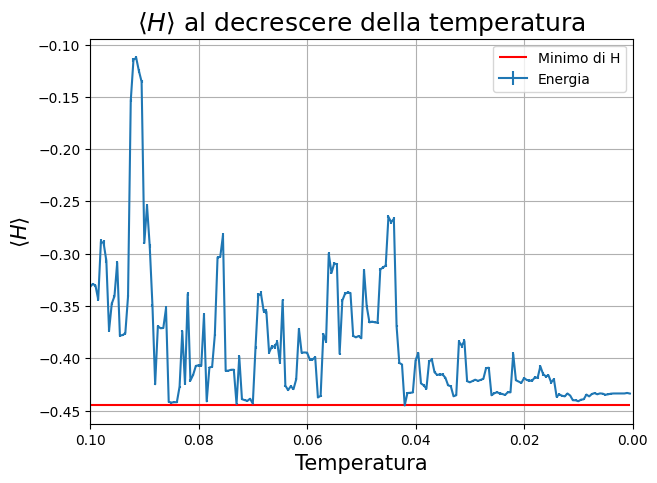

In [4]:

fig = plt.figure( figsize = (7,5) )
plt.title(r"$\langle H \rangle$ al decrescere della temperatura", size=18)

plt.errorbar(temp, energy, sigmaE, label = "Energia")
plt.xlabel("Temperatura", size=15)
plt.ylabel(r"$\langle H \rangle$", size = 15)

plt.xlim(0.1, 0)

plt.grid(True)
plt.hlines(min(energy), max(temp), min(temp), color="red", label="Minimo di H" )
plt.legend()

plt.show()

Si osserva che, come previsto, l'energia media descresce al decrescere della temperatura, e le sue oscillazioni si riducono. Ciò riflette il fatto che il Simulated Annealing esplora configurazioni sempre più ristrette all'intorno del minimo, stabilizzando i valori di energia calcolati.

Di seguito vengono riportati i risultati a blocchi dell'energia per la configuarazione di parametri che la minimizza.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

ave_E, err_E = np.loadtxt("./dati/Min_Energy.dat", unpack= True, usecols=(0,1), skiprows=1)

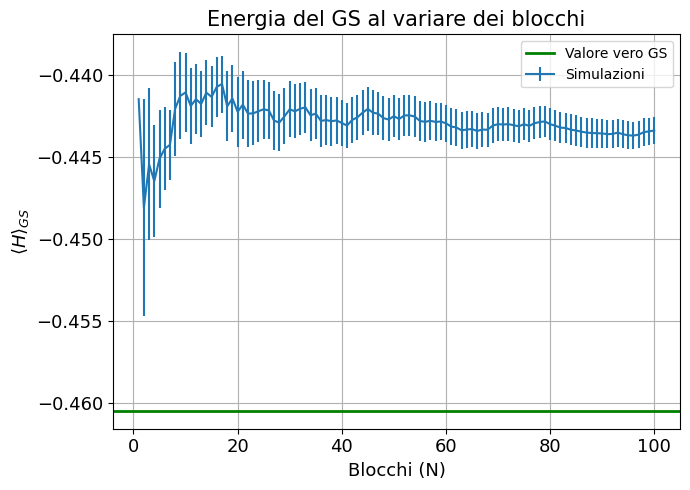

Valor medio dell'energia di GS dai dati simulati:  -0.443 +\- 0.001
Livello di confidenza con il valore atteso:  20.76 sigma


In [12]:
N=len(ave_E) # numero di blocchi
x = np.arange(1, N+1)      # [1,2,...,N] valori asse x, numero di blocchi

plt.figure(figsize=(7, 5))
plt.title("Energia del GS al variare dei blocchi",fontsize=15)

plt.errorbar(x, ave_E, yerr= err_E, label = "Simulazioni") #plotto la media cumulativa

plt.xlabel(r"Blocchi (N)", fontsize=13)
plt.ylabel(r"$\langle H \rangle_{GS}$", fontsize=13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

real_GS = -0.4605
plt.axhline(y=real_GS, xmin=0, xmax=1, label= "Valore vero GS", lw = 2, color = 'green')

plt.legend(loc='upper right', prop={'size': 10})

# plt.ylim(-0.47, -0.28)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Valor medio dell'energia di GS dai dati simulati: ", round(ave_E[-1],3), "+\-", round(err_E[-1],3))
print("Livello di confidenza con il valore atteso: ",round((ave_E[-1] - real_GS)/err_E[-1],2), "sigma")

Dai risultati ottenuti è possibile notare che il valore dell'energia di Ground State $non$ è compatibile con il valore vero. Questo fatto suggerisce di modificare la funzione d'onda di test, in modo da utilizzarne una (sperabilmente) più corretta per approssimare quella vera. L'algoritmo SA, infatti, trova la miglior configurazione dei parametri variazionali di un problema $\textit{fissata la funzione di test}$; tuttavia, come in questo caso, non è detto che essa sia anche la soluzione migliore tra tutte le funzioni di test utilizzabili (e quindi quella che più si avvicina alla soluzione corretta).

Di seguito viene riportato il campionamento della funzione $|\psi|^2_{t}$ con i parametri di $\mu$ e $\sigma$ che minimizzano l'energia, confrontando la distribuzione con i risultati analitici e i risultati ottenuti trasformando l'equazione di Schrodinger in equazione matriciale.

Ground state energy:  -0.46046587969271546
1st excited state energy:  0.09742471331760956
2nd excited state energy:  1.9717331343930202


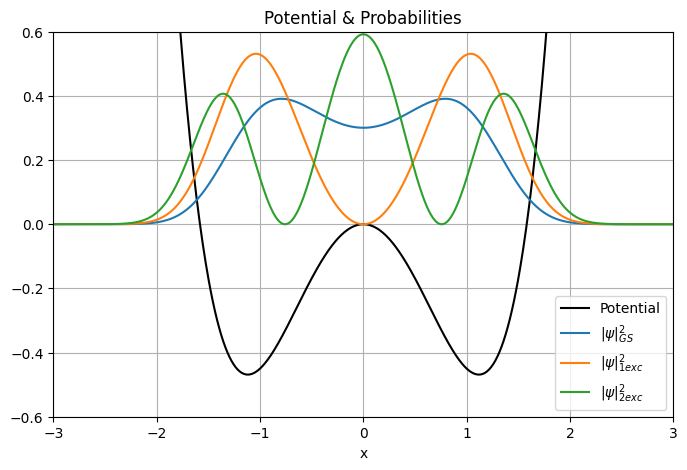

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label=r"$|\psi|^2_{GS}$")
plt.plot(x,(psi[1])**2, label=r"$|\psi|^2_{1exc}$")
plt.plot(x,(psi[2])**2, label=r"$|\psi|^2_{2exc}$")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend(loc='lower right', prop={'size': 10})

plt.show()

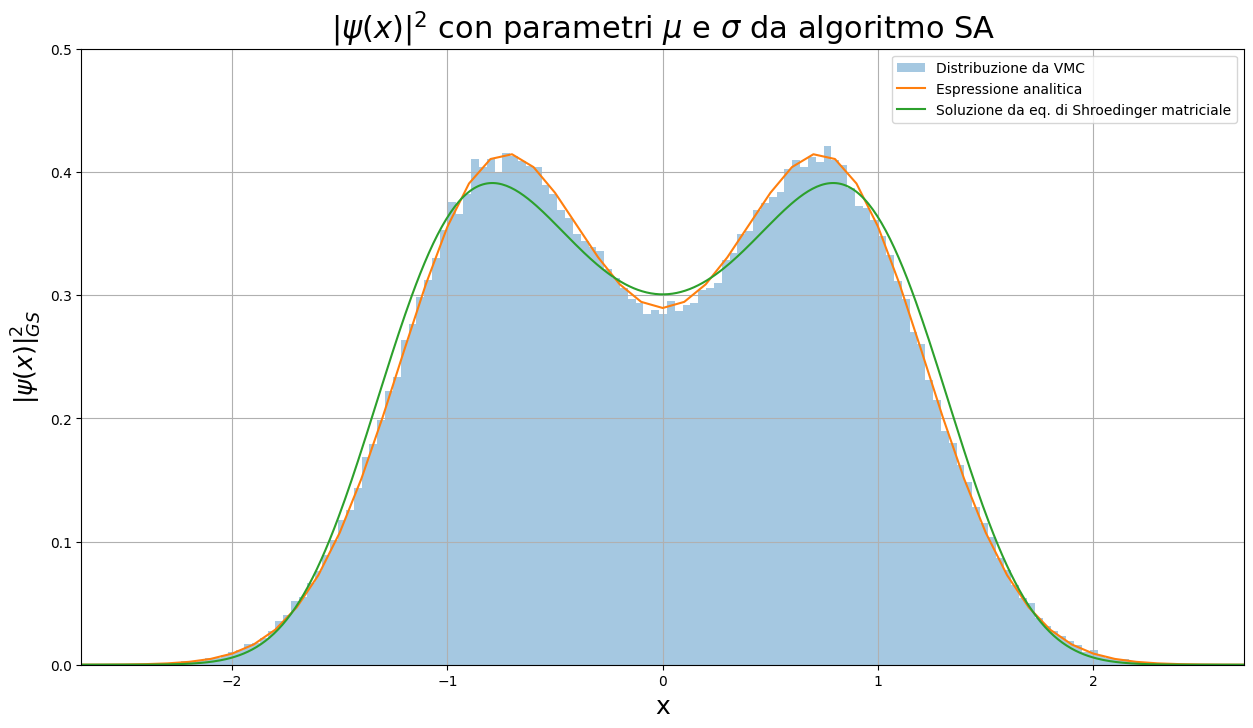

In [15]:
mu_min = 0.8
sigma_min = 0.62

psi_h = np.loadtxt("./dati/Psi2_sampling.dat", unpack='true')
x_range = np.arange(-3, 3, step=0.1)


def psi2_an(x, mu , sigma):
    exp1 = np.exp(-0.5*((x-mu)/sigma)**2)
    exp2 = np.exp(-0.5*((x+mu)/sigma)**2)
    norm = 2*np.sqrt(np.pi)*sigma*(1+np.exp(-(mu/sigma)**2)) 
    return (exp1 + exp2)**2/norm


fig = plt.figure(figsize = (15,8))
plt.title(r"$|\psi(x)|^2$ con parametri $\mu$ e $\sigma$ da algoritmo SA", size = 22)

plt.hist(psi_h, 150, density='true', alpha=0.4, label="Distribuzione da VMC")
plt.plot(x_range, psi2_an(x_range, mu_min, sigma_min), label="Espressione analitica")
plt.plot(x, (psi[0])**2, label = "Soluzione da eq. di Shroedinger matriciale")
plt.legend()

plt.ylim(0, 0.5)
plt.xlim(-2.7,2.7)

plt.grid(True)
plt.ylabel(r"$|\psi(x)|^2_{GS}$" , size = 18)
plt.xlabel(r"x", size = 18)

plt.show()

Da questo plot è possibile notare che i parametri variazionali $\mu$ e $\sigma$ estratti dall'algoritmo SA rendono la distribuzione $|\psi|^2_{T}$ simile a quella analitica ma diversa dalla soluzione reale dell'equazione differenziale.